<a href="https://colab.research.google.com/github/OmarFarukNoman/Into-to-Machine-Learning/blob/main/Homework-5/Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best Parameters:
  W1 (area): 754133.9375
  W2 (bedrooms): 56726.1211
  W3 (bathrooms): 575772.1250
  W4 (stories): 474680.7812
  W5 (parking): 334633.7500
  B (bias): 4758814.5000

Final Training Loss: 1589941370880.0000
Final Validation Loss: 1326684700672.0000


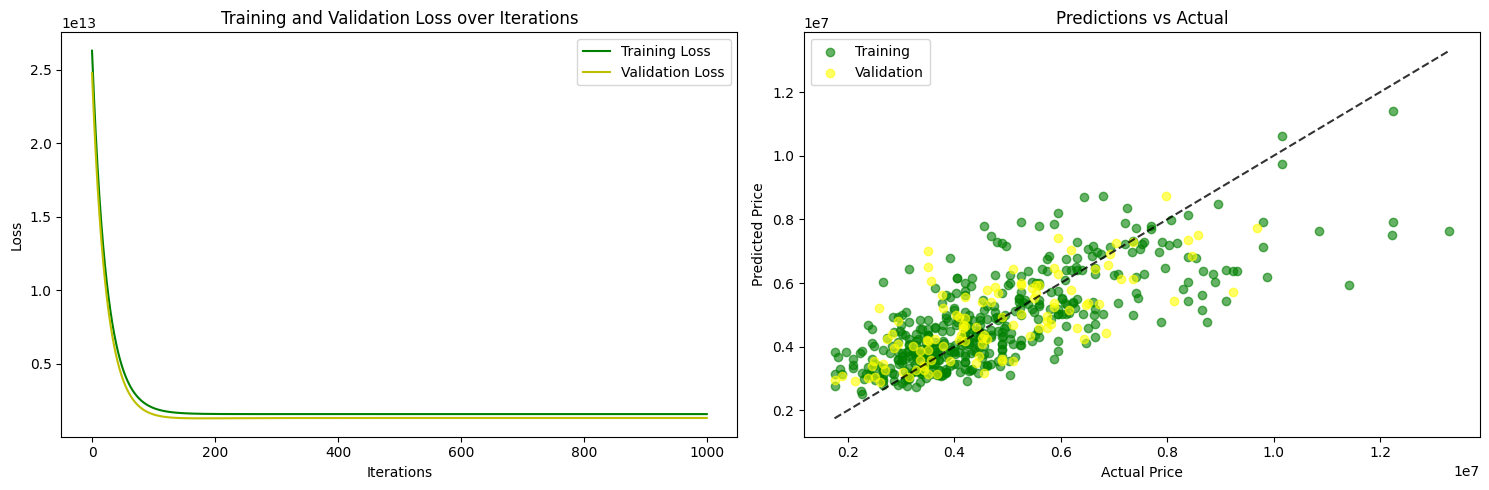


Final Model: price = 4758814.5000 + 754133.9375*area + 56726.1211*bedrooms + 575772.1250*bathrooms + 474680.7812*stories + 334633.7500*parking


In [16]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# We're using housing dataset for HW5
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
df = pd.read_csv(url)

# I've separated features and target
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

X_in = df[features].values
y_out = df[target].values

# I've splited the data (80% training, 20% validation) using PyTorch
torch.manual_seed(42)              # for reproducibility
N = X_in.shape[0]
train_size = int(0.8 * N)

indices = torch.randperm(N)        # random permutation of indices
train_idx = indices[:train_size].numpy()
val_idx   = indices[train_size:].numpy()

X_in_train = X_in[train_idx]
X_in_val   = X_in[val_idx]
y_out_train = y_out[train_idx]
y_out_val   = y_out[val_idx]

# Standardization
scaler = StandardScaler()
X_in_train_scaled = scaler.fit_transform(X_in_train)
X_in_val_scaled = scaler.transform(X_in_val)

# Converted to PyTorch tensors
X_in_train_tensor = torch.FloatTensor(X_in_train_scaled)
y_out_train_tensor = torch.FloatTensor(y_out_train).reshape(-1, 1)
X_in_val_tensor = torch.FloatTensor(X_in_val_scaled)
y_out_val_tensor = torch.FloatTensor(y_out_val).reshape(-1, 1)

# Linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

# Initialize model
input_dim = len(features)
model = LinearRegressionModel(input_dim)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
Iterations = 1000

# It's for storing losses
train_losses = []
val_losses = []

for epoch in range(Iterations):
    # Training phase
    model.train()
    optimizer.zero_grad()

    # Forward pass
    train_outputs = model(X_in_train_tensor)
    train_loss = criterion(train_outputs, y_out_train_tensor)

    # Backward pass and optimization
    train_loss.backward()
    optimizer.step()

    # Validation loss calculation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_in_val_tensor)
        val_loss = criterion(val_outputs, y_out_val_tensor)

    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())

# Best parameters and predictions
model.eval()
with torch.no_grad():
    # Weights and bias
    weights = model.linear.weight.data.numpy().flatten()
    bias = model.linear.bias.data.numpy().item()

    # Predictions
    train_predictions = model(X_in_train_tensor)
    val_predictions = model(X_in_val_tensor)

    # Calculate final losses
    final_train_loss = criterion(train_predictions, y_out_train_tensor)
    final_val_loss = criterion(val_predictions, y_out_val_tensor)

# Results
print("Best Parameters:")
for i, feature in enumerate(features):
    print(f"  W{i+1} ({feature}): {weights[i]:.4f}")
print(f"  B (bias): {bias:.4f}")

# Print final losses
print(f"\nFinal Training Loss: {final_train_loss.item():.4f}")
print(f"Final Validation Loss: {final_val_loss.item():.4f}")

# Training and validation loss over iterations
plt.figure(figsize=(15, 5))

# Loss over iterations
plt.subplot(1, 2, 1)
plt.plot(range(Iterations), train_losses, 'g-', label='Training Loss')
plt.plot(range(Iterations), val_losses, 'y-', label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Iterations')
plt.legend()

# Predictions vs actual
plt.subplot(1, 2, 2)
plt.scatter(y_out_train, train_predictions.numpy(), alpha=0.6, label='Training', color='green')
plt.scatter(y_out_val, val_predictions.numpy(), alpha=0.6, label='Validation', color='yellow')
plt.plot([y_out.min(), y_out.max()], [y_out.min(), y_out.max()], 'k--', alpha=0.8)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predictions vs Actual')
plt.legend()

plt.tight_layout()
plt.show()

# Model equation
equation = f"price = {bias:.4f}"
for i, feature in enumerate(features):
    equation += f" + {weights[i]:.4f}*{feature}"
print(f"\nFinal Model: {equation}")


Learning Rate: 0.1
Epoch    1: Train Loss = 26305955364864.00, Val Loss = 16326891405312.00
Epoch  500: Train Loss = 1589941239808.00, Val Loss = 1326688108544.00
Epoch 1000: Train Loss = 1589941239808.00, Val Loss = 1326688108544.00
Epoch 1500: Train Loss = 1589941239808.00, Val Loss = 1326688108544.00
Epoch 2000: Train Loss = 1589941239808.00, Val Loss = 1326688108544.00
Epoch 2500: Train Loss = 1589941239808.00, Val Loss = 1326688108544.00
Epoch 3000: Train Loss = 1589941239808.00, Val Loss = 1326688108544.00
Epoch 3500: Train Loss = 1589941239808.00, Val Loss = 1326688108544.00
Epoch 4000: Train Loss = 1589941239808.00, Val Loss = 1326688108544.00
Epoch 4500: Train Loss = 1589941239808.00, Val Loss = 1326688108544.00
Epoch 5000: Train Loss = 1589941239808.00, Val Loss = 1326688108544.00

Learning Rate: 0.01
Epoch    1: Train Loss = 26305963753472.00, Val Loss = 24784393994240.00
Epoch  500: Train Loss = 1589942288384.00, Val Loss = 1326223196160.00
Epoch 1000: Train Loss = 1589941

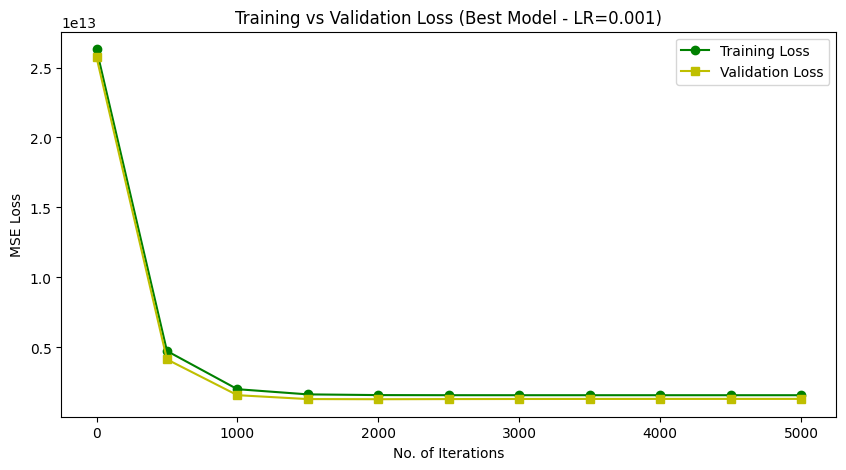

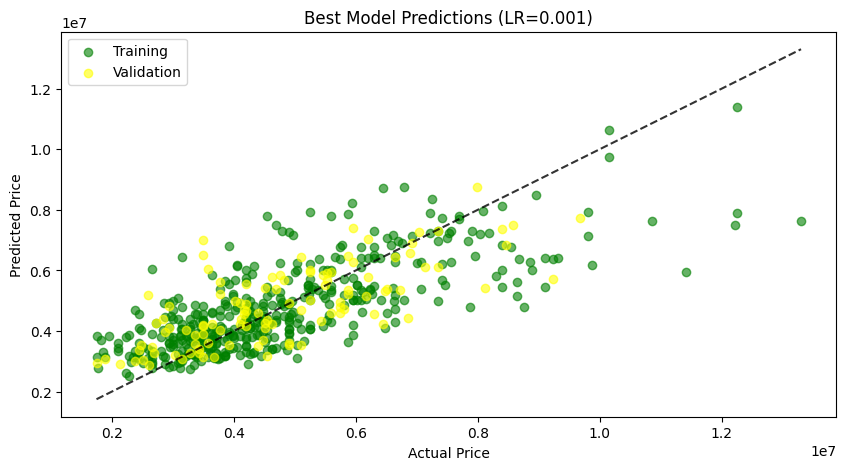

In [17]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# We're using housing dataset for HW5
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
df = pd.read_csv(url)

# I've separated features and target
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

X_in = df[features].values
y_out = df[target].values

# Split data using PyTorch (80% training, 20% validation)
torch.manual_seed(42)          # for reproducibility
N = X_in.shape[0]
train_size = int(0.8 * N)

X_in_tensor = torch.FloatTensor(X_in)
y_out_tensor = torch.FloatTensor(y_out).reshape(-1, 1)

# Create random permutation of indices
indices = torch.randperm(N)
train_idx = indices[:train_size]
val_idx   = indices[train_size:]

# Split the tensors directly
X_in_train = X_in_tensor[train_idx]
X_in_val   = X_in_tensor[val_idx]
y_out_train = y_out_tensor[train_idx]
y_out_val   = y_out_tensor[val_idx]

# Standardization (convert back to numpy for sklearn, then back to tensor)
scaler = StandardScaler()
X_in_train_scaled = scaler.fit_transform(X_in_train.numpy())
X_in_val_scaled = scaler.transform(X_in_val.numpy())

# Convert back to PyTorch tensors
X_in_train_tensor = torch.FloatTensor(X_in_train_scaled)
y_out_train_tensor = y_out_train.clone()
X_in_val_tensor = torch.FloatTensor(X_in_val_scaled)
y_out_val_tensor = y_out_val.clone()


# Linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

# Loss function
criterion = nn.MSELoss()

# I've explored four different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
Iterations = 5000

# Store results for each learning rate
results = {}
best_model = None
best_loss = float('inf')
best_lr = None

for lr in learning_rates:
    print(f"\nLearning Rate: {lr}")

    # Initialize model
    model = LinearRegressionModel(len(features))
    optimizer = optim.SGD(model.parameters(), lr=lr)

    # Store losses for this learning rate
    train_losses = []
    val_losses = []

    for epoch in range(Iterations):
        # Training phase
        model.train()
        optimizer.zero_grad()

        # Forward pass
        train_outputs = model(X_in_train_tensor)
        train_loss = criterion(train_outputs, y_out_train_tensor)

        # Backward pass and optimization
        train_loss.backward()
        optimizer.step()

        # Validation phase every 500 epochs
        if (epoch + 1) % 500 == 0 or epoch == 0:
            model.eval()
            with torch.no_grad():
                val_outputs = model(X_in_val_tensor)
                val_loss = criterion(val_outputs, y_out_val_tensor)

            train_losses.append(train_loss.item())
            val_losses.append(val_loss.item())

            print(f"Epoch {epoch+1:4d}: Train Loss = {train_loss.item():.2f}, Val Loss = {val_loss.item():.2f}")

    # Final results
    final_train_loss = train_losses[-1]
    final_val_loss = val_losses[-1]
    results[lr] = {
        'model': model,
        'final_train_loss': final_train_loss,
        'final_val_loss': final_val_loss,
        'train_losses': train_losses,
        'val_losses': val_losses
    }

    # Check if this is the best model
    if final_val_loss < best_loss:
        best_loss = final_val_loss
        best_model = model
        best_lr = lr

# Comparison
print("\nComparison of Final Loss (Both Training & Validation):")
print(f"{'Learning Rate':<12} {'Final Train Loss':<18} {'Final Val Loss':<16}")
for lr in learning_rates:
    result = results[lr]
    print(f"{lr:<12} {result['final_train_loss']:<18.2f} {result['final_val_loss']:<16.2f}")

print(f"\nBest Model: \n\nLearning Rate = {best_lr} \nTraining loss = {results[best_lr]['final_train_loss']:.2f} \nValidation Loss = {best_loss:.2f}")

# Best parameters
best_model.eval()
with torch.no_grad():
    weights = best_model.linear.weight.data.numpy().flatten()
    bias = best_model.linear.bias.data.numpy().item()

    # Make predictions with best model
    train_predictions = best_model(X_in_train_tensor)
    val_predictions = best_model(X_in_val_tensor)

# Display best model parameters
print("Parameters =")
for i, feature in enumerate(features):
    print(f"  W{i+1} ({feature}): {weights[i]:.4f}")
print(f"  B (bias): {bias:.4f}")

# Model equation
equation = f"price = {bias:.4f}"
for i, feature in enumerate(features):
    equation += f" + {weights[i]:.4f}*{feature}"
print(f"\nFinal Model Equation: {equation}")

# Training vs Validation loss for best model
plt.figure(figsize=(10, 5))
epochs_to_plot = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
best_result = results[best_lr]
epochs_display = epochs_to_plot[:len(best_result['train_losses'])]

plt.plot(epochs_display, best_result['train_losses'], 'g-', marker='o', label='Training Loss')
plt.plot(epochs_display, best_result['val_losses'], 'y-', marker='s', label='Validation Loss')
plt.xlabel('No. of Iterations')
plt.ylabel('MSE Loss')
plt.title(f'Training vs Validation Loss (Best Model - LR={best_lr})')
plt.legend()
plt.show()

# Predictions vs actual for best model
plt.figure(figsize=(10, 5))
plt.scatter(y_out_train_tensor.numpy(), train_predictions.numpy(), alpha=0.6, label='Training', color='green')
plt.scatter(y_out_val_tensor.numpy(), val_predictions.numpy(), alpha=0.6, label='Validation', color='yellow')
plt.plot([y_out.min(), y_out.max()], [y_out.min(), y_out.max()], 'k--', alpha=0.8)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Best Model Predictions (LR={best_lr})')
plt.legend()
plt.show()